In [1]:
import numpy as np
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
seed = 0
np.random.seed(seed)

In [3]:
train_file = 'data/Lightning7_TRAIN'

In [4]:
test_file = 'data/Lightning7_TEST'

In [5]:
sampling_rate = 3

In [21]:
row_use = 30

# Prep Train Data

In [6]:
train_data = np.loadtxt(train_file)

In [7]:
np.random.shuffle(train_data)

In [8]:
X_train = train_data[:,1:]

In [9]:
y_train = train_data[:,0]

In [10]:
print(X_train[0])

[-8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01 -8.1445768e-01
 -7.9804237e-01 -7.7140486e-01 -7.3391189e-01 -6.3615070e-01
 -6.9596877e-01 -6.9178352e-01 -6.1833320e-01 -1.8026970e-01
 -1.2979070e-01 -1.7230622e-01 -2.2826234e-01 -3.2209728e-01
 -2.5053791e-01 -2.06907

In [11]:
print(y_train)

[5. 0. 3. 6. 2. 5. 0. 5. 4. 0. 2. 5. 1. 4. 6. 0. 5. 1. 3. 4. 3. 5. 0. 4.
 5. 3. 6. 5. 3. 1. 3. 1. 1. 3. 5. 5. 5. 5. 5. 0. 3. 5. 1. 6. 6. 2. 5. 2.
 5. 6. 0. 3. 6. 1. 5. 3. 6. 5. 2. 2. 0. 1. 2. 3. 5. 2. 3. 6. 4. 6.]


In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
plt.plot(X_train[1])
plt.show()

In [ ]:
plt.plot(X_train[1, ::sampling_rate])
plt.show()

In [22]:
X_train_sampling = X_train[:row_use, ::sampling_rate]

In [23]:
X_train_sampling.shape

(30, 107)

# Prep Test Data

In [24]:
test_data = np.loadtxt(test_file)

In [25]:
np.random.shuffle(test_data)

In [26]:
X_test = test_data[:,1:]

In [27]:
y_test = test_data[:,0]

In [28]:
print(X_test[0])

[-8.3463759e-01 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01
 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01
 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01
 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01
 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01
 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01
 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01
 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01
 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01
 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01
 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01
 -8.3463759e-01 -8.3463759e-01 -8.3463759e-01 -8.3223185e-01
 -8.1087034e-01 -7.5671717e-01 -7.8157149e-01 -7.3929725e-01
 -6.8545235e-01 -6.2996269e-01 -6.0861906e-01 -6.4863555e-01
 -4.7144440e-01 -3.6852364e-01 -3.6441509e-01 -3.3457575e-01
 -3.7553438e-01 -4.3284164e-01 -3.4729107e-01 -3.4293656e-01
 -4.6951734e-01 -3.97916

In [29]:
print(y_test[0])

5.0


In [30]:
X_test_sampling = X_test[:row_use, ::sampling_rate]

In [31]:
X_test_sampling.shape

(30, 107)

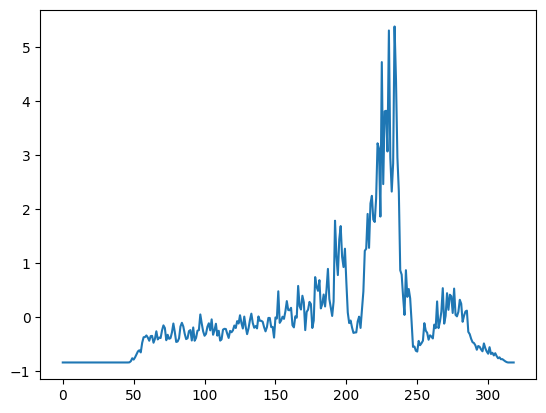

In [32]:
plt.plot(X_test[0])
plt.show()

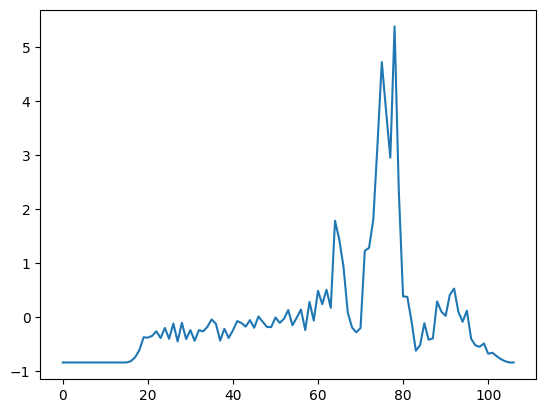

In [33]:
plt.plot(X_test_sampling[0])
plt.show()

# Train Model

In [34]:
def DTW(a, b):
    # ถ้า DTW  ทำช้าอาจต้องทำ sampling เพื่อลดปริมาณ data ทำ DTW จะได้เร็วขึ้น    
    an = a.size
    bn = b.size
    pointwise_distance = distance.cdist(a.reshape(-1,1),b.reshape(-1,1))
    cumdist = np.matrix(np.ones((an+1,bn+1)) * np.inf)
    cumdist[0,0] = 0
    
    for ai in range(an):
        for bi in range(bn):
            minimum_cost = np.min([cumdist[ai, bi+1],
                                   cumdist[ai+1, bi],
                                   cumdist[ai, bi]])
            cumdist[ai+1, bi+1] = pointwise_distance[ai,bi] + minimum_cost

    return cumdist[an, bn]

In [35]:
def DTWWithWeightNeighborCell(a,b,**kwargs):
    # print("weight",kwargs["alpha"],kwargs["beta"],kwargs["gamma"])
    an = a.size
    bn = b.size
    pointwise_distance = distance.cdist(a.reshape(-1,1),b.reshape(-1,1))
    cumdist = np.matrix(np.ones((an+1,bn+1)) * np.inf)
    cumdist[0,0] = 0
    
    for ai in range(an):
        for bi in range(bn):
            minimum_cost = np.min([kwargs["alpha"]*cumdist[ai, bi+1],
                                   kwargs["beta"]*cumdist[ai, bi],
                                   kwargs["gamma"]*cumdist[ai+1, bi]])
            cumdist[ai+1, bi+1] = pointwise_distance[ai,bi] + minimum_cost

    return cumdist[an, bn]

# Test Symmetric Model

In [38]:
clf = KNeighborsClassifier(metric =DTW,n_neighbors=1,n_jobs=-1)
clf.fit(X_train_sampling, y_train[0:row_use])

KNeighborsClassifier(metric=<function DTW at 0x0000016878153F40>, n_jobs=-1,
                     n_neighbors=1)

In [39]:
y_pred = clf.predict(X_test_sampling)

In [40]:
print(classification_report(y_test[0:row_use], y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       0.50      0.50      0.50         2
         2.0       0.67      0.67      0.67         3
         3.0       0.60      0.75      0.67         4
         4.0       1.00      0.83      0.91         6
         5.0       0.54      0.78      0.64         9
         6.0       0.00      0.00      0.00         3

    accuracy                           0.67        30
   macro avg       0.62      0.60      0.60        30
weighted avg       0.64      0.67      0.64        30



c:\Users\Pakorn Kongrit\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pakorn Kongrit\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pakorn Kongrit\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Create Model with weight neighboring cells [Test Asymmetric]

In [41]:
def createMetricParams(alphaMax,betaMax,gammaMax):
    metricParamsArray = []
    for i in range(1,alphaMax+1):
        for j in range(1,betaMax+1):
            for k in range(1,gammaMax+1):
                if (i == k):
                    continue
                metricParam = {"alpha":i,"beta":j,"gamma":k}
                metricParamsArray.append(metricParam)
    return metricParamsArray

In [43]:
createMetricParams(4,4,4)

[{'alpha': 1, 'beta': 1, 'gamma': 2},
 {'alpha': 1, 'beta': 1, 'gamma': 3},
 {'alpha': 1, 'beta': 1, 'gamma': 4},
 {'alpha': 1, 'beta': 2, 'gamma': 2},
 {'alpha': 1, 'beta': 2, 'gamma': 3},
 {'alpha': 1, 'beta': 2, 'gamma': 4},
 {'alpha': 1, 'beta': 3, 'gamma': 2},
 {'alpha': 1, 'beta': 3, 'gamma': 3},
 {'alpha': 1, 'beta': 3, 'gamma': 4},
 {'alpha': 1, 'beta': 4, 'gamma': 2},
 {'alpha': 1, 'beta': 4, 'gamma': 3},
 {'alpha': 1, 'beta': 4, 'gamma': 4},
 {'alpha': 2, 'beta': 1, 'gamma': 1},
 {'alpha': 2, 'beta': 1, 'gamma': 3},
 {'alpha': 2, 'beta': 1, 'gamma': 4},
 {'alpha': 2, 'beta': 2, 'gamma': 1},
 {'alpha': 2, 'beta': 2, 'gamma': 3},
 {'alpha': 2, 'beta': 2, 'gamma': 4},
 {'alpha': 2, 'beta': 3, 'gamma': 1},
 {'alpha': 2, 'beta': 3, 'gamma': 3},
 {'alpha': 2, 'beta': 3, 'gamma': 4},
 {'alpha': 2, 'beta': 4, 'gamma': 1},
 {'alpha': 2, 'beta': 4, 'gamma': 3},
 {'alpha': 2, 'beta': 4, 'gamma': 4},
 {'alpha': 3, 'beta': 1, 'gamma': 1},
 {'alpha': 3, 'beta': 1, 'gamma': 2},
 {'alpha': 3

In [44]:
parameters = {'n_neighbors':[1],'metric_params':createMetricParams(4,4,4)}
clf = GridSearchCV(KNeighborsClassifier(metric =DTWWithWeightNeighborCell), parameters, cv=2,verbose=10,n_jobs=-1)
clf.fit(X_train_sampling, y_train[0:row_use])

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2,
             estimator=KNeighborsClassifier(metric=<function DTWWithWeightNeighborCell at 0x000001683E6379A0>),
             n_jobs=-1,
             param_grid={'metric_params': [{'alpha': 1, 'beta': 1, 'gamma': 2},
                                           {'alpha': 1, 'beta': 1, 'gamma': 3},
                                           {'alpha': 1, 'beta': 1, 'gamma': 4},
                                           {'alpha': 1, 'beta': 2, 'gamma': 2},
                                           {'alpha': 1, 'beta': 2, 'gamma': 3},
                                           {'alpha': 1, 'beta': 2, 'gamma': 4},
                                           {'alpha': 1, '...
                                           {'alpha': 2, 'beta': 3, 'gamma': 3},
                                           {'alpha': 2, 'beta': 3, 'gamma': 4},
                                           {'alpha': 2, 'beta': 4, 'gamma': 1},
                                           {'alpha': 2, 'beta': 4, 'gamma': 3},
                                           {'alpha': 2, 'beta': 4, 'gamma': 4},
                                           {'alpha': 3, 'beta': 1, 'gamma': 1},
                                           {'alpha': 3, 'beta': 1, 'gamma': 2},
                                           {'alpha': 3, 'beta': 1, 'gamma': 4},
                                           {'alpha': 3, 'beta': 2, 'gamma': 1},
                                           {'alpha': 3, 'beta': 2, 'gamma': 2},
                                           {'alpha': 3, 'beta': 2, 'gamma': 4}, ...],
                         'n_neighbors': [1]},
             verbose=10)

In [45]:
grid_search_result = clf.cv_results_
grid_search_result_pd = pd.DataFrame.from_dict(grid_search_result)

In [46]:
grid_search_result_pd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric_params,param_n_neighbors,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001996,0.000000e+00,58.989515,0.587029,"{'alpha': 1, 'beta': 1, 'gamma': 2}",1,"{'metric_params': {'alpha': 1, 'beta': 1, 'gam...",0.733333,0.733333,0.733333,0.000000,1
1,0.001996,0.000000e+00,59.320520,0.296034,"{'alpha': 1, 'beta': 1, 'gamma': 3}",1,"{'metric_params': {'alpha': 1, 'beta': 1, 'gam...",0.600000,0.733333,0.666667,0.066667,2
2,0.002994,9.981394e-04,58.992491,0.058004,"{'alpha': 1, 'beta': 1, 'gamma': 4}",1,"{'metric_params': {'alpha': 1, 'beta': 1, 'gam...",0.600000,0.733333,0.666667,0.066667,2
3,0.005495,3.499269e-03,60.299515,1.728027,"{'alpha': 1, 'beta': 2, 'gamma': 2}",1,"{'metric_params': {'alpha': 1, 'beta': 2, 'gam...",0.266667,0.133333,0.200000,0.066667,13
4,0.002994,9.983778e-04,60.351012,1.075528,"{'alpha': 1, 'beta': 2, 'gamma': 3}",1,"{'metric_params': {'alpha': 1, 'beta': 2, 'gam...",0.266667,0.133333,0.200000,0.066667,13
5,0.002494,4.974604e-04,61.515543,0.321999,"{'alpha': 1, 'beta': 2, 'gamma': 4}",1,"{'metric_params': {'alpha': 1, 'beta': 2, 'gam...",0.266667,0.133333,0.200000,0.066667,13
6,0.001506,5.029440e-04,61.211034,0.274500,"{'alpha': 1, 'beta': 3, 'gamma': 2}",1,"{'metric_params': {'alpha': 1, 'beta': 3, 'gam...",0.266667,0.133333,0.200000,0.066667,13
7,0.002002,5.602837e-06,60.745014,2.325529,"{'alpha': 1, 'beta': 3, 'gamma': 3}",1,"{'metric_params': {'alpha': 1, 'beta': 3, 'gam...",0.266667,0.133333,0.200000,0.066667,13
8,0.001002,1.907349e-06,60.691057,0.886824,"{'alpha': 1, 'beta': 3, 'gamma': 4}",1,"{'metric_params': {'alpha': 1, 'beta': 3, 'gam...",0.266667,0.133333,0.200000,0.066667,13
9,0.001004,1.907349e-06,63.419458,0.494496,"{'alpha': 1, 'beta': 4, 'gamma': 2}",1,"{'metric_params': {'alpha': 1, 'beta': 4, 'gam...",0.266667,0.133333,0.200000,0.066667,13


In [47]:
grid_search_result_pd[grid_search_result_pd['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric_params,param_n_neighbors,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001996,0.0,58.989515,0.587029,"{'alpha': 1, 'beta': 1, 'gamma': 2}",1,"{'metric_params': {'alpha': 1, 'beta': 1, 'gam...",0.733333,0.733333,0.733333,0.0,1


In [48]:
model = clf.best_estimator_

In [49]:
y_pred = model.predict(X_test_sampling)
print(classification_report(y_test[0:row_use], y_pred))

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         1.0       1.00      0.50      0.67         2
         2.0       1.00      0.67      0.80         3
         3.0       0.50      0.50      0.50         4
         4.0       0.71      0.83      0.77         6
         5.0       0.64      0.78      0.70         9
         6.0       0.00      0.00      0.00         3

    accuracy                           0.67        30
   macro avg       0.64      0.61      0.60        30
weighted avg       0.63      0.67      0.63        30



c:\Users\Pakorn Kongrit\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pakorn Kongrit\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pakorn Kongrit\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


จาก db Lighting7 เราจะเห็นว่า Symmetric ดีเท่ากับ Asymmetric